In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#from utils.models import *
#from utils.align import *

In [10]:
threshold = np.random.uniform(low=0.0, high=1.0, size=(17))
print(threshold)

[ 0.98897945  0.86356926  0.00574615  0.20246553  0.83269828  0.94339513
  0.32532105  0.73151853  0.98098446  0.10027523  0.55345299  0.6433027
  0.93283794  0.51644266  0.88752097  0.14641542  0.67270878]


In [13]:
pred = np.random.uniform(low=0.0, high=1.0, size=(10,17))
print(pred)
print(pred.shape[1])

[[ 0.71866931  0.37071542  0.25747142  0.19845476  0.82290012  0.87166765
   0.1265113   0.91300897  0.06859385  0.76221252  0.18469959  0.325558
   0.16164087  0.55684411  0.79472625  0.74226203  0.48453512]
 [ 0.0444302   0.76910368  0.27200232  0.1634991   0.05805072  0.19272633
   0.44888826  0.07095029  0.40876541  0.82105426  0.91073469  0.6051755
   0.92894975  0.82745031  0.00740463  0.69713487  0.61829663]
 [ 0.77686088  0.15377061  0.02851445  0.95569442  0.71947544  0.21670085
   0.32697622  0.02554749  0.1174709   0.02948691  0.65272431  0.05120691
   0.76012099  0.73926971  0.87221123  0.41290017  0.76049972]
 [ 0.52952774  0.51381025  0.59460923  0.11839231  0.68926683  0.08594834
   0.40706969  0.33210222  0.18646349  0.40482549  0.38436788  0.69161606
   0.82884268  0.50238951  0.93747478  0.96635731  0.88976185]
 [ 0.94144337  0.33030463  0.31716553  0.24162995  0.12037438  0.18881801
   0.66298639  0.10343194  0.64933999  0.13148751  0.62434809  0.38691462
   0.923347

In [4]:
t = pred > threshold
print (t)

[[ True  True False False False  True False  True  True False False  True
   True False  True  True False]
 [ True  True  True False False False False False False False False  True
  False False  True  True False]
 [ True  True False False False False  True False  True False False  True
   True False  True  True  True]
 [False  True False False False False False  True False False False False
  False False  True False  True]
 [ True  True False False False False  True False False False False False
  False False False  True  True]
 [ True  True False False False False False False  True  True False  True
  False False  True  True  True]
 [ True False False  True  True False  True False  True False False  True
  False False  True  True False]
 [ True  True False False False False  True  True False  True False  True
  False False  True False  True]
 [ True  True False  True False False False  True False  True False  True
   True False  True  True  True]
 [ True False False  True False False

In [5]:
m = 1
m /= float(100)
print (m)

0.01


In [6]:
abc = [1,2,3,4,5,6]
abc[:3]

[1, 2, 3]

In [7]:
print(pred.shape[0])
print(pred.shape[1])

10
17


In [8]:
print(threshold[2:4])

[ 0.71584207  0.62680256]


In [13]:
a = np.array([[1, 2], [3, 4]])

In [19]:
b = np.array([])
b = np.vstack([a,b]) if b.size else a
print(b)

[[1 2]
 [3 4]]


In [12]:
data_mask_label = np.array(['R', 'G', 'B', 'NDVI', 'NDWI', 'NIR'])
data_mask = np.array([True,True,True,True,False,False]) # RGB+NDVI
filtered = data_mask_label[data_mask]
print(np.array_str(filtered))

['R' 'G' 'B' 'NDVI']


In [14]:
def duplicate_samples_y(train_X, train_Y, dup_target_y, multiplier=2):
    """duplicate samples.  train_Y has N 1,0 tuples.  dup_target_y in [0,N). append to end of input arrays"""
    
    target_y = train_Y[:,dup_target_y]
    print(target_y)
    mask = ma.make_mask(target_y)
    additional_X = train_X[mask]
    print(additional_X)
    additional_Y = train_Y[mask]
    print(additional_Y)
    
    for i in range(1, multiplier):
        train_X = np.concatenate((train_X, additional_X), axis=0)
        train_Y = np.concatenate((train_Y, additional_Y), axis=0)

    return train_X, train_Y

In [15]:
x = np.array([1,2,300,4,500,6])
y = np.array([[0,1,1,0], [0,1,1,1], [0,0,0,0], [0,1,1,0], [0,1,0,0], [1,1,1,1]])


newx, newy = duplicate_samples_y(x, y, 3, multiplier=3)
print(newx)
print(newy)

[0 1 0 0 0 1]
[2 6]
[[0 1 1 1]
 [1 1 1 1]]
[  1   2 300   4 500   6   2   6   2   6]
[[0 1 1 0]
 [0 1 1 1]
 [0 0 0 0]
 [0 1 1 0]
 [0 1 0 0]
 [1 1 1 1]
 [0 1 1 1]
 [1 1 1 1]
 [0 1 1 1]
 [1 1 1 1]]


In [2]:
labels = ['slash_burn', 'clear', 'blooming', 'primary', 'cloudy', 'conventional_mine', 'water', 'haze', 'cultivation', 'partly_cloudy', 'artisinal_mine', 'habitation', 'bare_ground', 'blow_down', 'agriculture', 'road', 'selective_logging']
labels.index('habitation')

11

In [3]:
recall_l = np.random.uniform(low=0.0, high=1.0, size=(17))
precision_l = np.random.uniform(low=0.5, high=0.8, size=(17))

print (recall_l)
print (precision_l)

count_stats_df = pd.DataFrame({
    'label': labels, 
    'recall': recall_l,
    'precision': precision_l
})

[ 0.67110686  0.45373571  0.31221583  0.32049423  0.56789333  0.94410113
  0.66482473  0.06186901  0.10256963  0.74259393  0.24041905  0.89804437
  0.36899212  0.08540033  0.27440888  0.26618049  0.40470576]
[ 0.61782945  0.53972064  0.52878542  0.68153201  0.55141485  0.51324694
  0.68263416  0.52582906  0.52535608  0.51513038  0.7961157   0.79964867
  0.50518597  0.74401729  0.72329192  0.56224621  0.67074485]


In [6]:
colors = cm.rainbow(np.linspace(0, 1, len(count_stats_df['label'])))

fig, ax = plt.subplots()
ax.scatter(count_stats_df['precision'], count_stats_df['recall'], c=colors)
ax.set_xlabel('precision')
ax.set_ylabel('recall')


In [7]:
for i, txt in enumerate(count_stats_df['label']):
    ax.annotate(txt, (count_stats_df['precision'][i], count_stats_df['recall'][i]))

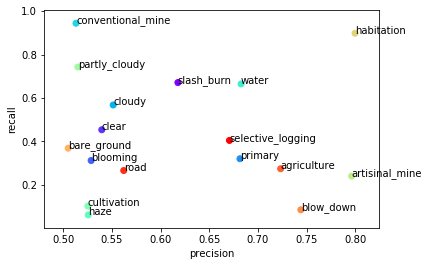

In [8]:
plt.show()

In [2]:
print(get_model_output_layer_size())
set_model_output_layer_size(1)
print(get_model_output_layer_size())

17
1


In [9]:
from utils.renderer import *

%matplotlib inline

# debug
#target_filename = 'train_2080'
#target_filename = 'train_2078' # primary fuzzy failed
#target_filename = 'train_10483'

#target_filename = 'train_17173' #cloud
#target_filename = 'train_18173'
#jpg_filename = train_jpg(target_filename)
#tiff_filename = train_tif(target_filename)

target_filename = 'file_12756'
#target_filename = 'file_12754' #IndexError
jpg_filename = test_jpg(target_filename)
tiff_filename = test_tif(target_filename)

jpg_img_raw = cv2.imread(jpg_filename)
tif_img_raw = cv2.imread(tiff_filename, cv2.IMREAD_UNCHANGED)

try:
    result = align_target_tif_to_jpg(tif_img_raw, jpg_img_raw, tif_img_raw, verbose=True)
    show_tiff_image_data(tif_img_raw)
except ValueError:
    print('Error: TIF and JPG are mismatched: {}'.format(target_filename))

IndexError: list index out of range

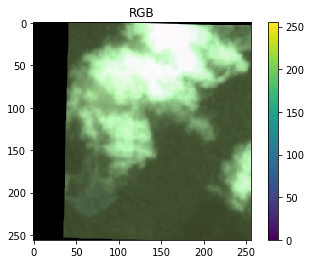

In [3]:
show_tiff_image_data(result)

In [2]:
score_file = 'master_scoreboard.csv'
df = pd.read_csv(score_file)
df.head()

,model_file,model_id,f2_score,val_accuracy,val_precision,val_recall,train_accuracy,train_precision,train_recall,training_time,num_channels,config,data_mask
0,aggregate_model_20170511-150149.h5,JAGG_1,0.889447,NaN,NaN,NaN,0.950815,0.902571,0.795162,0 days 00:07:02.069000000,4,NaN,RGBN
1,aggregate_model_20170511-180931.h5,JAGG_1,0.896287,NaN,NaN,NaN,0.953407,0.905887,0.808538,0 days 01:20:40.819000,3,NaN,NaN
2,aggregate_model_20170511-220711.h5,JAGG_1,0.893897,NaN,NaN,NaN,0.952527,0.905944,0.802767,0 days 01:40:52.325000,4,NaN,RGBN
3,aggregate_model_20170512-092940.h5,JAGG_1,0.884609,NaN,NaN,NaN,0.950599,0.901833,0.794459,0 days 01:40:18.884000,4,NaN,RGBN
4,aggregate_model_20170512-115655.h5,JAGG_1,0.888758,NaN,NaN,NaN,0.949077,0.903689,0.782218,0 days 02:06:06.810000,4,NaN,RGBN


In [6]:
df = df.round({'f2_score': 3, 'val_accuracy' : 3, 'val_precision': 3, 'val_recall' : 3, 
         'train_accuracy' : 3, 'train_precision': 3, 'train_recall' : 3})

In [8]:
df.head()

,model_file,model_id,f2_score,val_accuracy,val_precision,val_recall,train_accuracy,train_precision,train_recall,training_time,num_channels,config,data_mask
0,aggregate_model_20170511-150149.h5,JAGG_1,0.889,NaN,NaN,NaN,0.951,0.903,0.795,0 days 00:07:02.069000000,4,NaN,RGBN
1,aggregate_model_20170511-180931.h5,JAGG_1,0.896,NaN,NaN,NaN,0.953,0.906,0.809,0 days 01:20:40.819000,3,NaN,NaN
2,aggregate_model_20170511-220711.h5,JAGG_1,0.894,NaN,NaN,NaN,0.953,0.906,0.803,0 days 01:40:52.325000,4,NaN,RGBN
3,aggregate_model_20170512-092940.h5,JAGG_1,0.885,NaN,NaN,NaN,0.951,0.902,0.794,0 days 01:40:18.884000,4,NaN,RGBN
4,aggregate_model_20170512-115655.h5,JAGG_1,0.889,NaN,NaN,NaN,0.949,0.904,0.782,0 days 02:06:06.810000,4,NaN,RGBN


In [9]:
df['data_set'] = 'data_set'
df.head()

,model_file,model_id,f2_score,val_accuracy,val_precision,val_recall,train_accuracy,train_precision,train_recall,training_time,num_channels,config,data_mask,data_set
0,aggregate_model_20170511-150149.h5,JAGG_1,0.889,NaN,NaN,NaN,0.951,0.903,0.795,0 days 00:07:02.069000000,4,NaN,RGBN,data_set
1,aggregate_model_20170511-180931.h5,JAGG_1,0.896,NaN,NaN,NaN,0.953,0.906,0.809,0 days 01:20:40.819000,3,NaN,NaN,data_set
2,aggregate_model_20170511-220711.h5,JAGG_1,0.894,NaN,NaN,NaN,0.953,0.906,0.803,0 days 01:40:52.325000,4,NaN,RGBN,data_set
3,aggregate_model_20170512-092940.h5,JAGG_1,0.885,NaN,NaN,NaN,0.951,0.902,0.794,0 days 01:40:18.884000,4,NaN,RGBN,data_set
4,aggregate_model_20170512-115655.h5,JAGG_1,0.889,NaN,NaN,NaN,0.949,0.904,0.782,0 days 02:06:06.810000,4,NaN,RGBN,data_set


In [12]:
import os
print os.path.basename('D:/Downloads/amazon/haha.jpg')

haha.jpg


In [13]:
from utils.loader import *
print(get_training_set_file_path(64))

D:/Downloads/amazon/cache/train_set_dim64_rgb_ndvi_ndwi_nir_align_v3.h5


In [15]:
data_set_name = os.path.basename(get_training_set_file_path(64))
print(data_set_name)

train_set_dim64_rgb_ndvi_ndwi_nir_align_v3.h5


In [3]:
# demonstrate how we can combine 2 separate predictions into 1 by "max pooling"
a1 = np.random.uniform(low=1, high=10, size=(20))
a1 = a1.reshape(5,4)
print(a1)
a2 = np.random.uniform(low=1, high=10, size=(20))
a2 = a2.reshape(5,4)
print(a2)
a3 = np.maximum(a1, a2)
print(a3)

[[ 1.01265126  2.30859113  1.62718998  8.75343163]
 [ 4.91135743  3.64799078  9.73345285  2.74216278]
 [ 2.56659098  2.52703456  2.54330914  6.87983521]
 [ 7.22397532  7.18764802  1.47734563  6.01468259]
 [ 9.12609271  7.72148426  6.22318054  3.60336409]]
[[ 9.83497499  4.96377322  9.90794393  3.22561931]
 [ 8.78787616  9.05588601  1.83139654  1.17469948]
 [ 8.06097879  9.28453601  6.80604516  1.60045177]
 [ 5.31054987  1.17097465  3.61721292  3.32951038]
 [ 6.6402357   6.98896245  3.147175    9.20551936]]
[[ 9.83497499  4.96377322  9.90794393  8.75343163]
 [ 8.78787616  9.05588601  9.73345285  2.74216278]
 [ 8.06097879  9.28453601  6.80604516  6.87983521]
 [ 7.22397532  7.18764802  3.61721292  6.01468259]
 [ 9.12609271  7.72148426  6.22318054  9.20551936]]
